In [84]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1


In [85]:
import os
import pandas as pd

csv_path = os.path.join(path,"Mall_Customers.csv")
df=pd.read_csv(csv_path)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [86]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [87]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [88]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [89]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [90]:
df.drop(columns=['CustomerID'], inplace=True)

In [91]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [92]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'}, inplace=True)
df.head()

,Gender,Age,Income,Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns


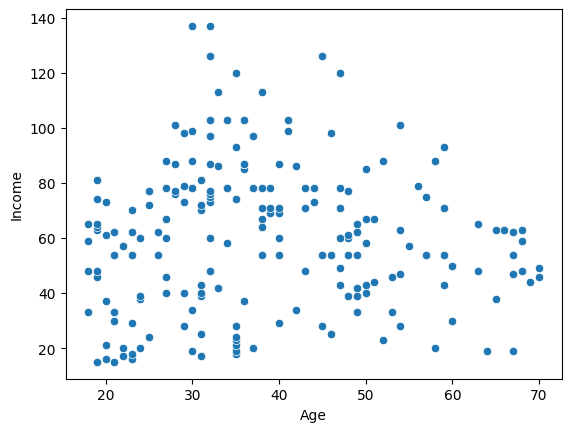

In [94]:
sns.scatterplot(x='Age', y='Income', data=df)
plt.show()


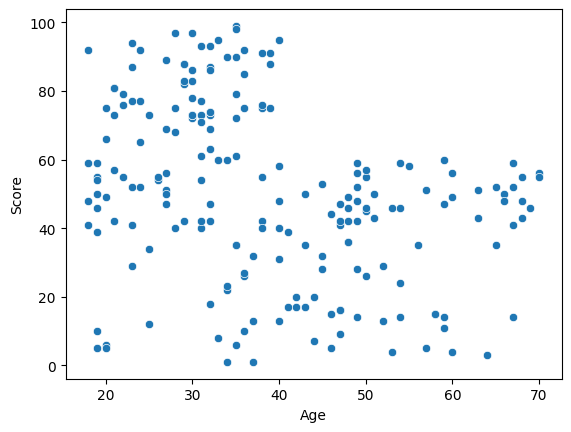

In [95]:
sns.scatterplot(x='Age', y='Score', data=df)
plt.show()

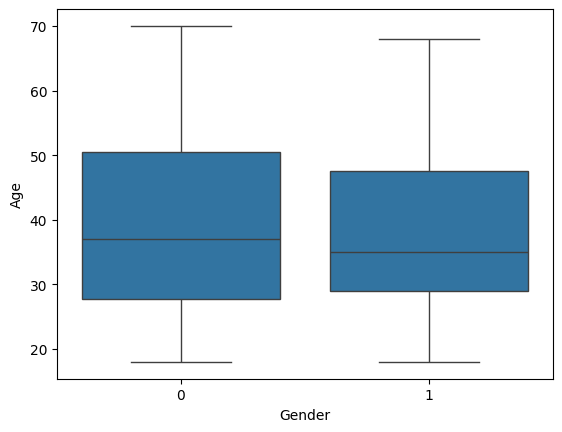

In [96]:
sns.boxplot(x='Gender', y='Age', data=df)
plt.show()

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scal = MinMaxScaler()
df[['Age','Income','Score']] = scal.fit_transform(df[['Age','Income','Score']])

In [99]:
mall=df
mall.head()

,Gender,Age,Income,Score
0,0,0.019231,0.000000,0.387755
1,0,0.057692,0.000000,0.816327
2,1,0.038462,0.008197,0.051020
3,1,0.096154,0.008197,0.775510
4,1,0.250000,0.016393,0.397959


In [100]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [101]:
knn = NearestNeighbors(n_neighbors=5)
nk = knn.fit(df[['Age','Income','Score']])
distances, indices = nk.kneighbors(df[['Age','Income','Score']])
print(distances,indices)

[[0.         0.2315757  0.26893109 0.28052522 0.28268491]
 [0.         0.04965855 0.05667847 0.05693549 0.08169474]
 [0.         0.28892699 0.33623759 0.33738296 0.40642616]
 [0.         0.02326224 0.03801056 0.04314273 0.05667847]
 [0.         0.0979552  0.10868472 0.18962599 0.19348722]
 [0.         0.02326224 0.03926558 0.04677702 0.05693549]
 [0.         0.08276518 0.21890614 0.21941916 0.25743614]
 [0.         0.11502859 0.14028828 0.15513319 0.15741334]
 [0.         0.11895721 0.12620348 0.16844746 0.23457035]
 [0.         0.05378337 0.10502067 0.12337353 0.12642736]
 [0.         0.12620348 0.17357111 0.19147628 0.26065703]
 [0.         0.03433807 0.22101431 0.23648405 0.27222196]
 [0.         0.10159332 0.14421106 0.16844746 0.17357111]
 [0.         0.03801056 0.04354059 0.04677702 0.05577432]
 [0.         0.08276518 0.15517744 0.19334808 0.19570173]
 [0.         0.03926558 0.04314273 0.04354059 0.04965855]
 [0.         0.02459016 0.0979552  0.12333472 0.16125596]
 [0.         0

In [102]:
import numpy as np

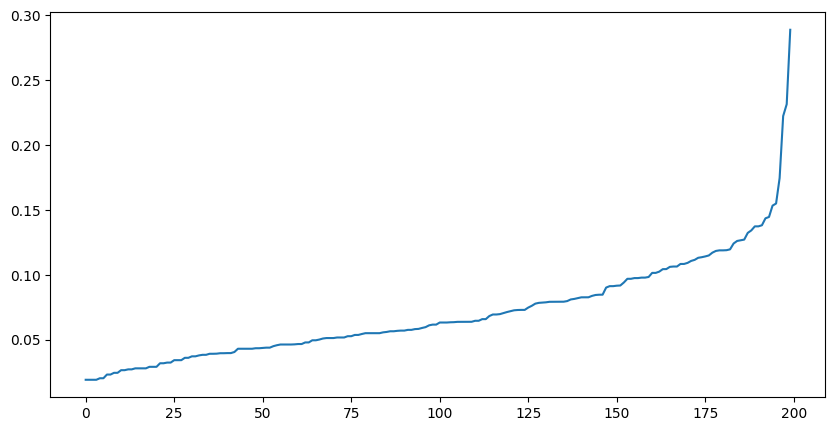

In [103]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.show()

In [104]:
dbscan = DBSCAN(eps=0.13, min_samples=5, metric='euclidean')

df['cluster'] = dbscan.fit_predict(df[['Age','Income','Score']])
df_filtered = df[df['cluster'] != -1]
df_filtered

,Gender,Age,Income,Score,cluster
1,0,0.057692,0.000000,0.816327,0
3,1,0.096154,0.008197,0.775510,0
5,1,0.076923,0.016393,0.765306,0
7,1,0.096154,0.024590,0.948980,0
9,1,0.230769,0.032787,0.724490,0
...,...,...,...,...,...
181,1,0.269231,0.672131,0.867347,4
183,1,0.211538,0.680328,0.887755,4
185,0,0.230769,0.688525,0.979592,4
187,0,0.192308,0.704918,0.683673,4


C:\Users\DELL\AppData\Local\Temp\ipykernel_14672\3886187568.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster')


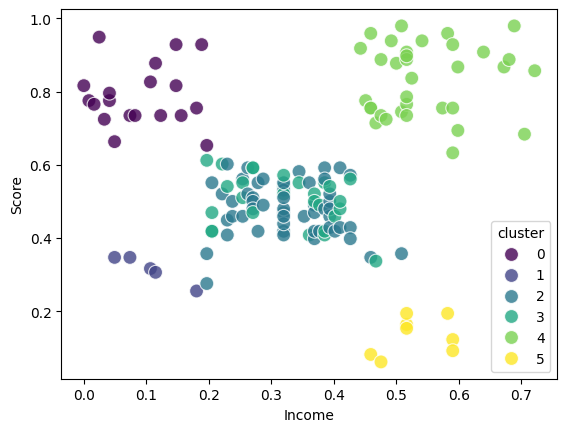

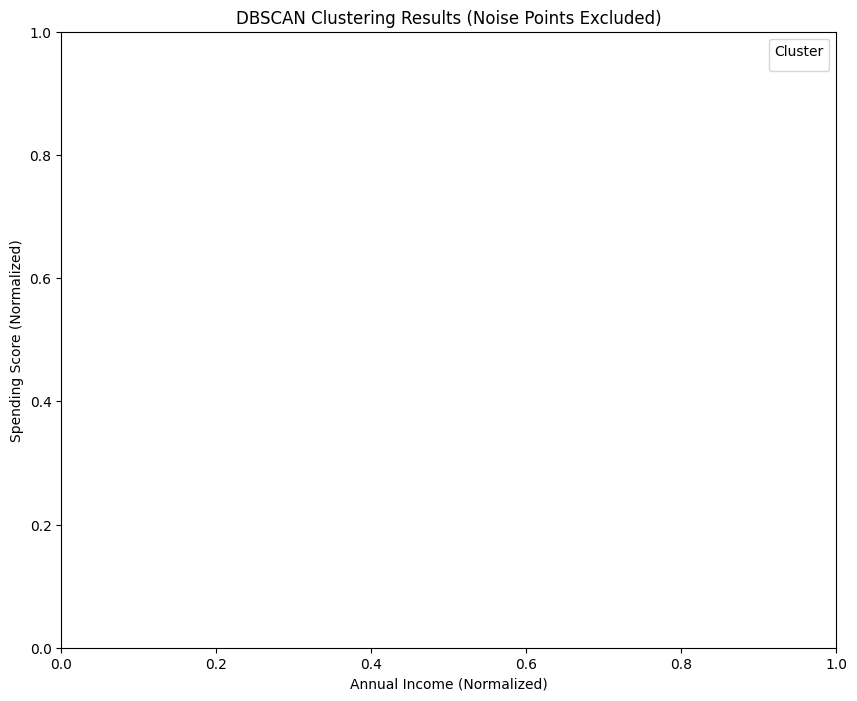

In [108]:
scatter = sns.scatterplot(
    data=df_filtered,
    x='Income',
    y='Score',
    hue='cluster',
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.figure(figsize=(10, 8))
plt.title('DBSCAN Clustering Results (Noise Points Excluded)')
plt.xlabel('Annual Income (Normalized)')
plt.ylabel('Spending Score (Normalized)')
plt.legend(title='Cluster')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

Silhouette Score: 0.5570
Number of clusters: 4
Number of noise points: 75 (37.50%)


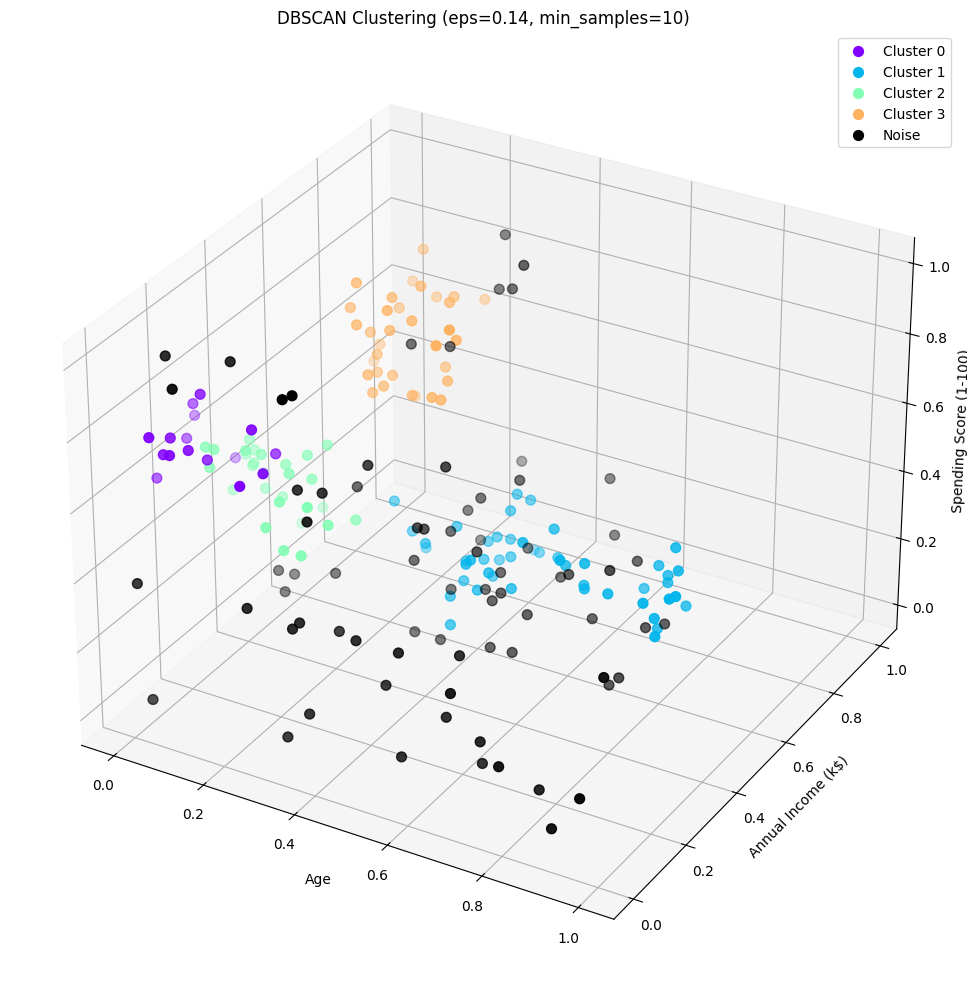

In [113]:

eps = 0.14
min_samples = 10


dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
labels = dbscan.fit_predict(df[['Age', 'Income', 'Score']])


if len(set(labels)) - (1 if -1 in labels else 0) >= 2:
    
    mask = labels != -1
    if sum(mask) > 1:  
        sil_score = silhouette_score(
            df[['Age', 'Income', 'Score']][mask], 
            labels[mask]
        )
        print(f"Silhouette Score: {sil_score:.4f}")
        
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        print(f"Number of clusters: {n_clusters}")
        print(f"Number of noise points: {n_noise} ({n_noise / len(labels):.2%})")


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        
        color = [0, 0, 0, 1]
    
    mask = labels == label
    ax.scatter(
        df['Age'][mask], 
        df['Income'][mask], 
        df['Score'][mask],
        c=[color], 
        label=f'Cluster {label}' if label != -1 else 'Noise',
        s=50
    )

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
plt.legend()
plt.tight_layout()
plt.show()